# SVM

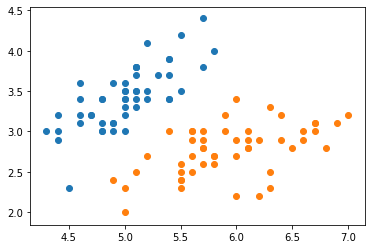

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

x = iris.data
y = iris.target
# 只做一个简单的二分类
x = x[y<2, :2]
y = y[y<2]

plt.scatter(x[y==0, 0], x[y==0, 1])
plt.scatter(x[y==1, 0], x[y==1, 1])
plt.show()

In [7]:
# 标准化数据
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

standardscaler = StandardScaler()
standardscaler.fit(x)
x_standard = standardscaler.transform(x)

In [8]:
#实现svm，先使用一个比较大的C
svc = LinearSVC(C=1e9)
svc.fit(x_standard, y)

LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

C: float参数 默认值为1.0
错误项的惩罚系数。C越大，即对分错样本的惩罚程度越大，因此在训练样本中准确率越高，但是泛化能力降低，也就是对测试数据的分类准确率降低。相反，减小C的话，容许训练样本中有一些误分类错误样本，泛化能力强。对于训练样本带有噪声的情况，一般采用后者，把训练样本集中错误分类的样本作为噪声。

kernel: 算法中采用的和函数类型，核函数是用来将非线性问题转化为线性问题的一种方法。参数选择有RBF, Linear, Poly, Sigmoid，precomputed或者自定义一个核函数, 默认的是"RBF"，即径向基核，也就是高斯核函数；而Linear指的是线性核函数，Poly指的是多项式核，Sigmoid指的是双曲正切函数tanh核；

multi_class：原始的SVM只适用于二分类问题，如果要将其扩展到多类分类，就要采取一定的融合策略，这里提供了三种选择。‘ovo’ 一对一，为one v one，即将类别两两之间进行划分，用二分类的方法模拟多分类的结果，决策所使用的返回的是（样本数，类别数*(类别数-1)/2）； ‘ovr’ 一对多，为one v rest，即一个类别与其他类别进行划分，返回的是(样本数，类别数)，或者None，就是不采用任何融合策略。

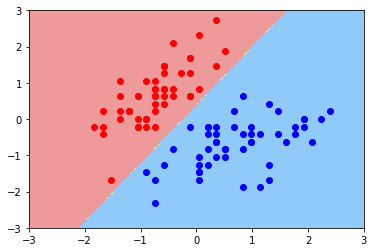

In [9]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(1, -1),
                         np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(1, -1),)
    x_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(x_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])

    plt.contourf(x0, x1, zz, cmap=custom_cmap)

plot_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(x_standard[y==0, 0], x_standard[y==0, 1], color='red')
plt.scatter(x_standard[y==1, 0], x_standard[y==1, 1], color='blue')
plt.show()

In [21]:
svc.coef_

array([[ 4.03239333, -2.50698746]])

In [22]:
svc.intercept_

array([0.92736734])

In [12]:
#使用一个比较小的C，对比C取不同值的效果
svc2 = LinearSVC(C=0.01)
svc2.fit(x_standard, y)

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

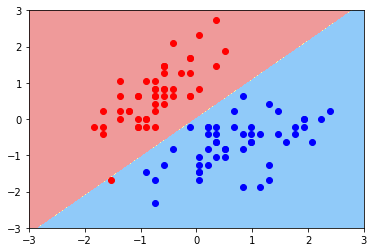

In [13]:
plot_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(x_standard[y==0, 0], x_standard[y==0, 1], color='red')
plt.scatter(x_standard[y==1, 0], x_standard[y==1, 1], color='blue')
plt.show()

In [16]:
#画出除了决策边界以外的两条跟支持向量相关的直线
def plot_svc_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(1, -1),
                         np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(1, -1),)
    x_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(x_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])

    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    
    w = model.coef_[0]
    b = model.intercept_[0]
    # w0*x0 + w1*x1 + b = 0
    # x1 = -w0/w1 * x0 - b/w1
    plot_x = np.linspace(axis[0], axis[1], 200)
    up_y = -w[0]/w[1] * plot_x - b/w[1] + 1/w[1]
    down_y = -w[0]/w[1] * plot_x - b/w[1] - 1/w[1]
    
    up_index = (up_y >= axis[2]) & (up_y <= axis[3])
    down_index = (down_y >= axis[2]) & (down_y <= axis[3])
    
    plt.plot(plot_x[up_index], up_y[up_index], color='black')
    plt.plot(plot_x[down_index], down_y[down_index], color='black')

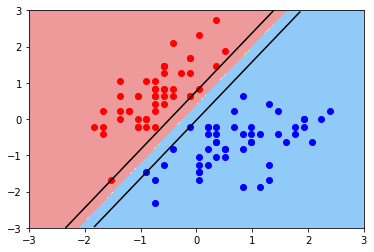

In [17]:
plot_svc_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(x_standard[y==0, 0], x_standard[y==0, 1], color='red')
plt.scatter(x_standard[y==1, 0], x_standard[y==1, 1], color='blue')
plt.show()

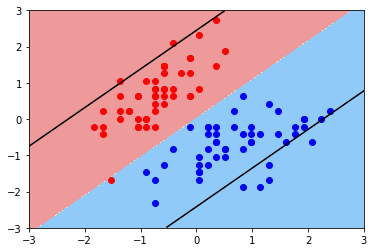

In [18]:
plot_svc_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(x_standard[y==0, 0], x_standard[y==0, 1], color='red')
plt.scatter(x_standard[y==1, 0], x_standard[y==1, 1], color='blue')
plt.show()

# SVM中使用多项式特征

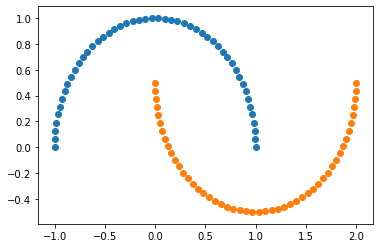

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

x, y = datasets.make_moons()
x.shape
# (100, 2)
y.shape
# (100,)
plt.scatter(x[y==0, 0], x[y==0, 1])
plt.scatter(x[y==1, 0], x[y==1, 1])
plt.show()

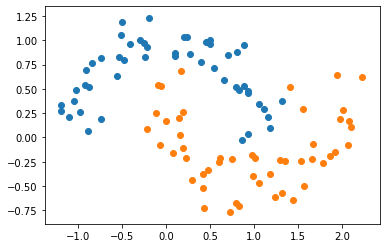

In [24]:
x, y = datasets.make_moons(noise=0.15, random_state=666)
plt.scatter(x[y==0, 0], x[y==0, 1])
plt.scatter(x[y==1, 0], x[y==1, 1])
plt.show()

In [25]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

def PolynomiaSVC(degree, C=1.0):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scale', StandardScaler()),
        ('linear_svc', LinearSVC(C=C))
    ])

poly_svc = PolynomiaSVC(degree=3)
poly_svc.fit(x, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=None,
                           tol=0.0001, verbose=0))],
         verbose=False)

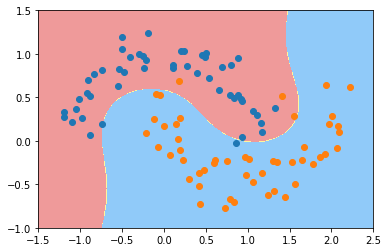

In [27]:
plot_decision_boundary(poly_svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(x[y==0, 0], x[y==0, 1])
plt.scatter(x[y==1, 0], x[y==1, 1])
plt.show()

In [31]:
boston = datasets.load_boston()
x = boston.data
y = boston.target

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=100)

from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def StandardLinearSVR(epsilon=0.1):
    return Pipeline([
        ('std_scale', StandardScaler()),
        # C, kernel, 等超参需要调节
        ('linear_svr', LinearSVR(epsilon=epsilon))
    ])

svr = StandardLinearSVR()
svr.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('std_scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svr',
                 LinearSVR(C=1.0, dual=True, epsilon=0.1, fit_intercept=True,
                           intercept_scaling=1.0, loss='epsilon_insensitive',
                           max_iter=1000, random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [32]:
svr.score(x_test,y_test)

0.6771087248833998